In [1]:
from IPython.display import Image, Audio
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,5)
from librosa.feature import spectral_centroid, mfcc
from scipy.io.wavfile import read
import numpy as np

# Feature extraction and analysis

### Feature types

Feature extraction is a technological method that attempts to find and rank the "amount" of some (musical) feature's presence in a track (or excerpt of a track). A feature is simply a statistic. Think of is as a "digital signature" for some musical factor. 

Features should be "informative". This means that we are looking for features that can characterize the behaviour of what we are trying to model. For instance, if we want to model the weather, features like temperature, humidity and wind or even the proportio of people wearing sandals or hats are all informative (they are related to the problem). By contrast, the result of a football game will not be an informative feature because it doesn't affect the weather.

Types of features we often collect from audio:

* Onsets 
* Timing data (e.g., tempo)
* Loudness
* Zero-crossing rate
* Key/frequency data (e.g., chromagram)
* Spectral features (e.g., centroid - bright/dark?, rolloff, MFCCs, spectral spread, spectral envelope, flux)
* RMS (root mean square - loudness?)

These all fall under the "content analysis" umbrella of MIR

#### Short-term vs long-term features
Short-term features are those that are calculated on a frame-by-frame basis. "Mid term" features are usually calculations or statistics that come *from* the averaging or addition of short term statistics, and long-term (or "global") statistics are ones that describe the audio signal or file as a whole.

#### Time versus Frequency domain
Features are often thought of as coming from one of the two domains: the time domain or the frequency domain. In this lecture we will focus on the latter.

## Features from Frequency domain

### Bandwidth
Is a measure of what range of frequencies are present in a signal. This is sometimes used to discrimitate between speech and music. (Music typically will have a larger bandwidth than speech).

`librosa.feature.spectral_bandwidth` is a function for calculating bandwidth.

### Spectral Rolloff
The spectral rolloff point is the frequency below which some cutoff (typically 85%) of the spectral energy exists. The roll-off frequency can be used to distinguish between harmonic (below roll-off) and noisy sounds (above roll-off). It is sometimes used to discriminate between different types of music tracks. 

`librosa` also has a function for calculating this feature.

The formula can be defined as follows: the frequency index R below which a certain fraction of $\gamma$ of the spectral energy resides (typically .85)

$$ \sum_{n=0}^{R_n -1} = X[k]^2 \ge \gamma \sum_{n} {|X[k]|}^2$$

Where $R_n$ is the frequency below which 85% of the spectrum is concentrated.


### Spectral Centroid
Spectral centroid describes the "gravitational center" or "point of balance" of spectral energy and is closely related to the brightness of a single tone. Perceptually, "nasality" is strongly correlated with spectral centroid. This feature has one of the highest impact on perceptual discrimination of timbre.

In general, high centroid values correspond to spectra with more high-frequency energy and to 'nasal' sounds, while low centroid values correspond to spectra with more low-frequency energy and to 'acute' or 'dull'  sounds.  

Qualitatively, spectral centroid can be likened to a spectrum's "center of gravity" or "balance point" of the spectrum with amplitude values representing "weights" and frequency values representing the "position" of each weight along a balance scale.

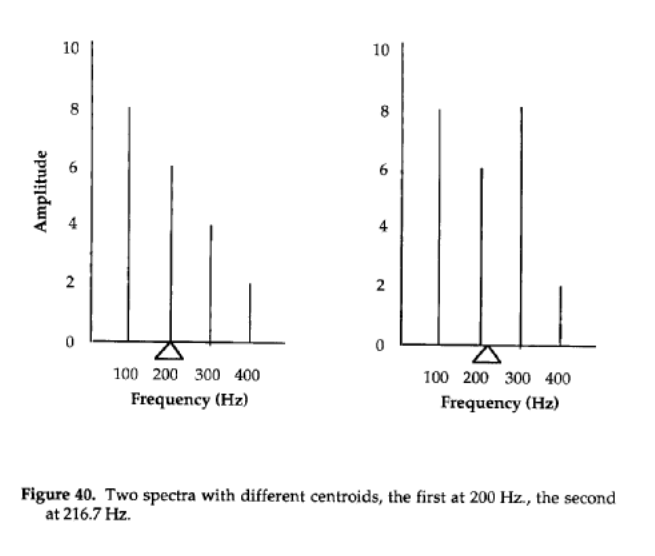

In [2]:
from IPython.display import Image
Image('../images/centroid.png', embed=True)

Calculating Centroid - Centroid is calculated by taking the sum of the frequencies weighted by (i.e. multiplied by) the magnitude spectrum, divided by the sums of the magnitudes. In other words, it is a weighted average. E.g.:

The calculation for the first spectrum in the example above is

$(8*100 + 6*200 + 4*300 + 2*400)/(8 + 6 + 4 + 2)$

...while the second is calculated as

$(8*100 + 6*200 + 8*300 + 2*400)/(8 + 6 + 8 + 2)$

This can be represented by the equation:
    $$C_n = \frac{\sum_{n=0}^{N-1}k(n)*x(n)}{\sum_{n=0}^{N-1}x(n)}$$
    
Where $k(n)$ is the center frequency of the $n$th bin, and $x(n)$ is the magnitude of the $n$th bin.

In [3]:
from librosa.feature import spectral_centroid
(fs, flute) = read('../uploaded_files/flute-A4.wav')
(fs2, oboe) = read('../uploaded_files/oboe-A4.wav')

In [4]:
from IPython.display import Audio
Audio('../uploaded_files/flute-A4.wav')

In [5]:
from IPython.display import Audio
Audio('../uploaded_files/oboe-A4.wav')

(1000, 5000)

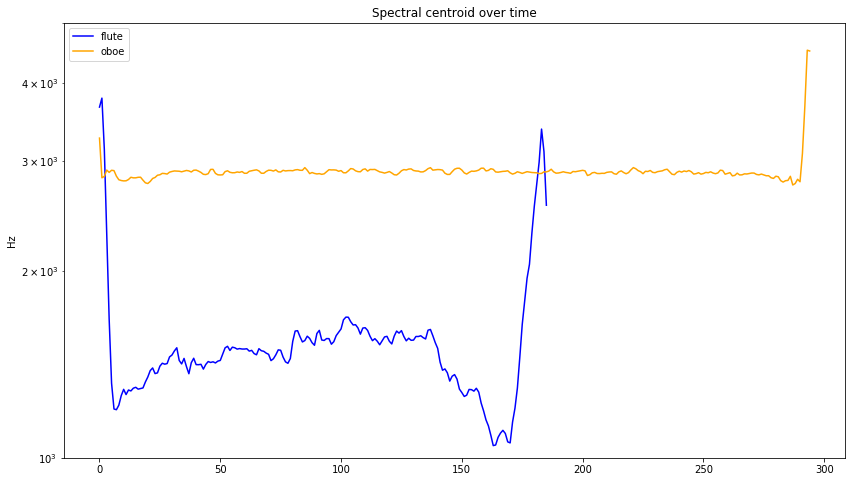

In [6]:
import matplotlib.lines as mlines
a = spectral_centroid(y=flute.astype(float), sr=fs)
b = spectral_centroid(y=oboe.astype(float), sr=fs2)
#create plot
plt.figure(figsize = (14,8))
plt.semilogy(a[0],'blue',b[0],'orange')
plt.title('Spectral centroid over time')
#make legend
blue_line = mlines.Line2D([], [], color='blue', label='flute')
org_line = mlines.Line2D([], [], color='orange', label='oboe')
plt.legend(handles=[blue_line, org_line])
#set axes limits and labels
plt.ylim(1000, 5000)
plt.ylabel('Hz')
plt.ylim(1000, 5000)

### Spectral Envelope
The spectral envelope is the tracing of the peaks of the magnitude spectrum for a single window of time.

### Spectral Flux
Spectral time-variance (spectral flux) is manifested as changes in the frequency and amplitude of a complex tone's components with time. 

Spectral Flux measures how quickly the power spectrum of a signal is changing, calculated by comparing the current value of each magnitude spectrum bin in the current window from the corresponding value of the magnitude spectrum of the previous window. Each of these differences is then squared, and the result is the sum of the squares.

$$SFX(t) = \sum_{k}(\frac{X_t[k]}{\sum X_t[k]} - \frac{X_{t-1}[k]}{\sum_{k} X_{t-1}[k]})^2$$

The spectral flux can be used to determine the timbre of an audio signal, or in onset detection, and like ZCR is also used in speech detection since spectral flux is higher for speech than music. 

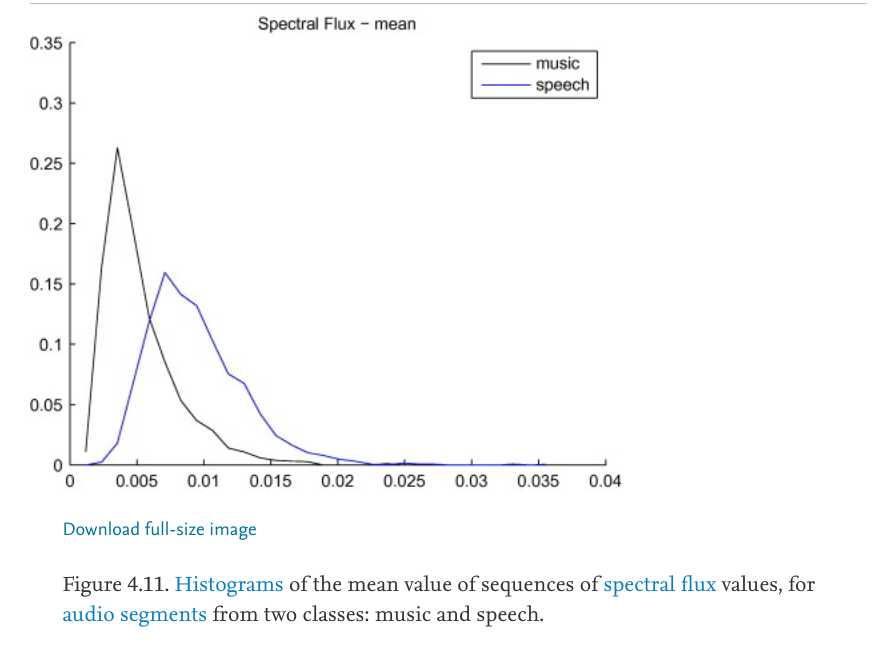

In [7]:
#Note: this is a TERRIBLE plot! Do not make plots like this!!
Image('../images/spectralFlux.png')

### Spectral Spread
The Spectral Spread, sometimes also referred to as instantaneous bandwidth,
describes how the spectrum is concentrated around the Spectral Centroid.

It has been shown that spectral spread contributes to the perception of "roughness".

### Mel Frequency Cepstral Coefficients
Mel Frequency = type of frequency scale (see below)  
**ceps**trum = play on **spec**trum  
Coefficients = values from each of the bins (just like DFT)

The Mel Frequency Cepstral Coefficients (MFCCs) are a compact (but complicated) representation
of the shape of the spectral envelope of an audio signal based on the **mel frequecy scale**

The mel frequency cepstral coefficients (MFCCs) of a signal are a computed set of coefficients that concisely model the overall shape of a spectral envelope. In MIR, they are widely used in speech recognition systems. They have proven useful in a variety of tasks including speech/music discrimination and genre classification.

#### Mel Scale
A **mel** is a unit of pitch defined so that pairs of sounds which are
perceptually equidistant in pitch are separated by an equal number of mels. In other words, the mel
scale is a "perceptually-motivated" scale of frequency intervals, which, if
judged by a human listener, are perceived to be equally spaced. Said another way, the Mel scale relates the perceived frequency of a tone to the actual measured frequency. (e.g., Humans are better at identifying small changes in speech at lower frequencies). 

Notice the scale appears roughly linear through ~700-1000Hz after which it becomes closer to logarithmic. To convert from frequency to mel scale, the formula is:

$$ m = 2595 \cdot log_{10}(1 + \frac{f}{500})$$

(note: some formulas use 700 as denominator instead of 500).

The scale was derived from experiments with human listeners. However, these experiments were done in the 1950s, and some modern audiologists think the scale is biased. According to this scale, in order to hear an octave doubling, you use the mel scale as the reference -- so 1000 mels doubled would equal 2000 mels, which should sound like an octave jump. This translates (if you look up the mel to Hz using the chart) to 1000Hz and 3500Hz!! (Use your sine tone generators to test this for yourself!)

Anyway, the mel scale is the basis for MFCCs which are widely used in MIR (and actually work very well, regardless of whether the scale is flawed or not!)

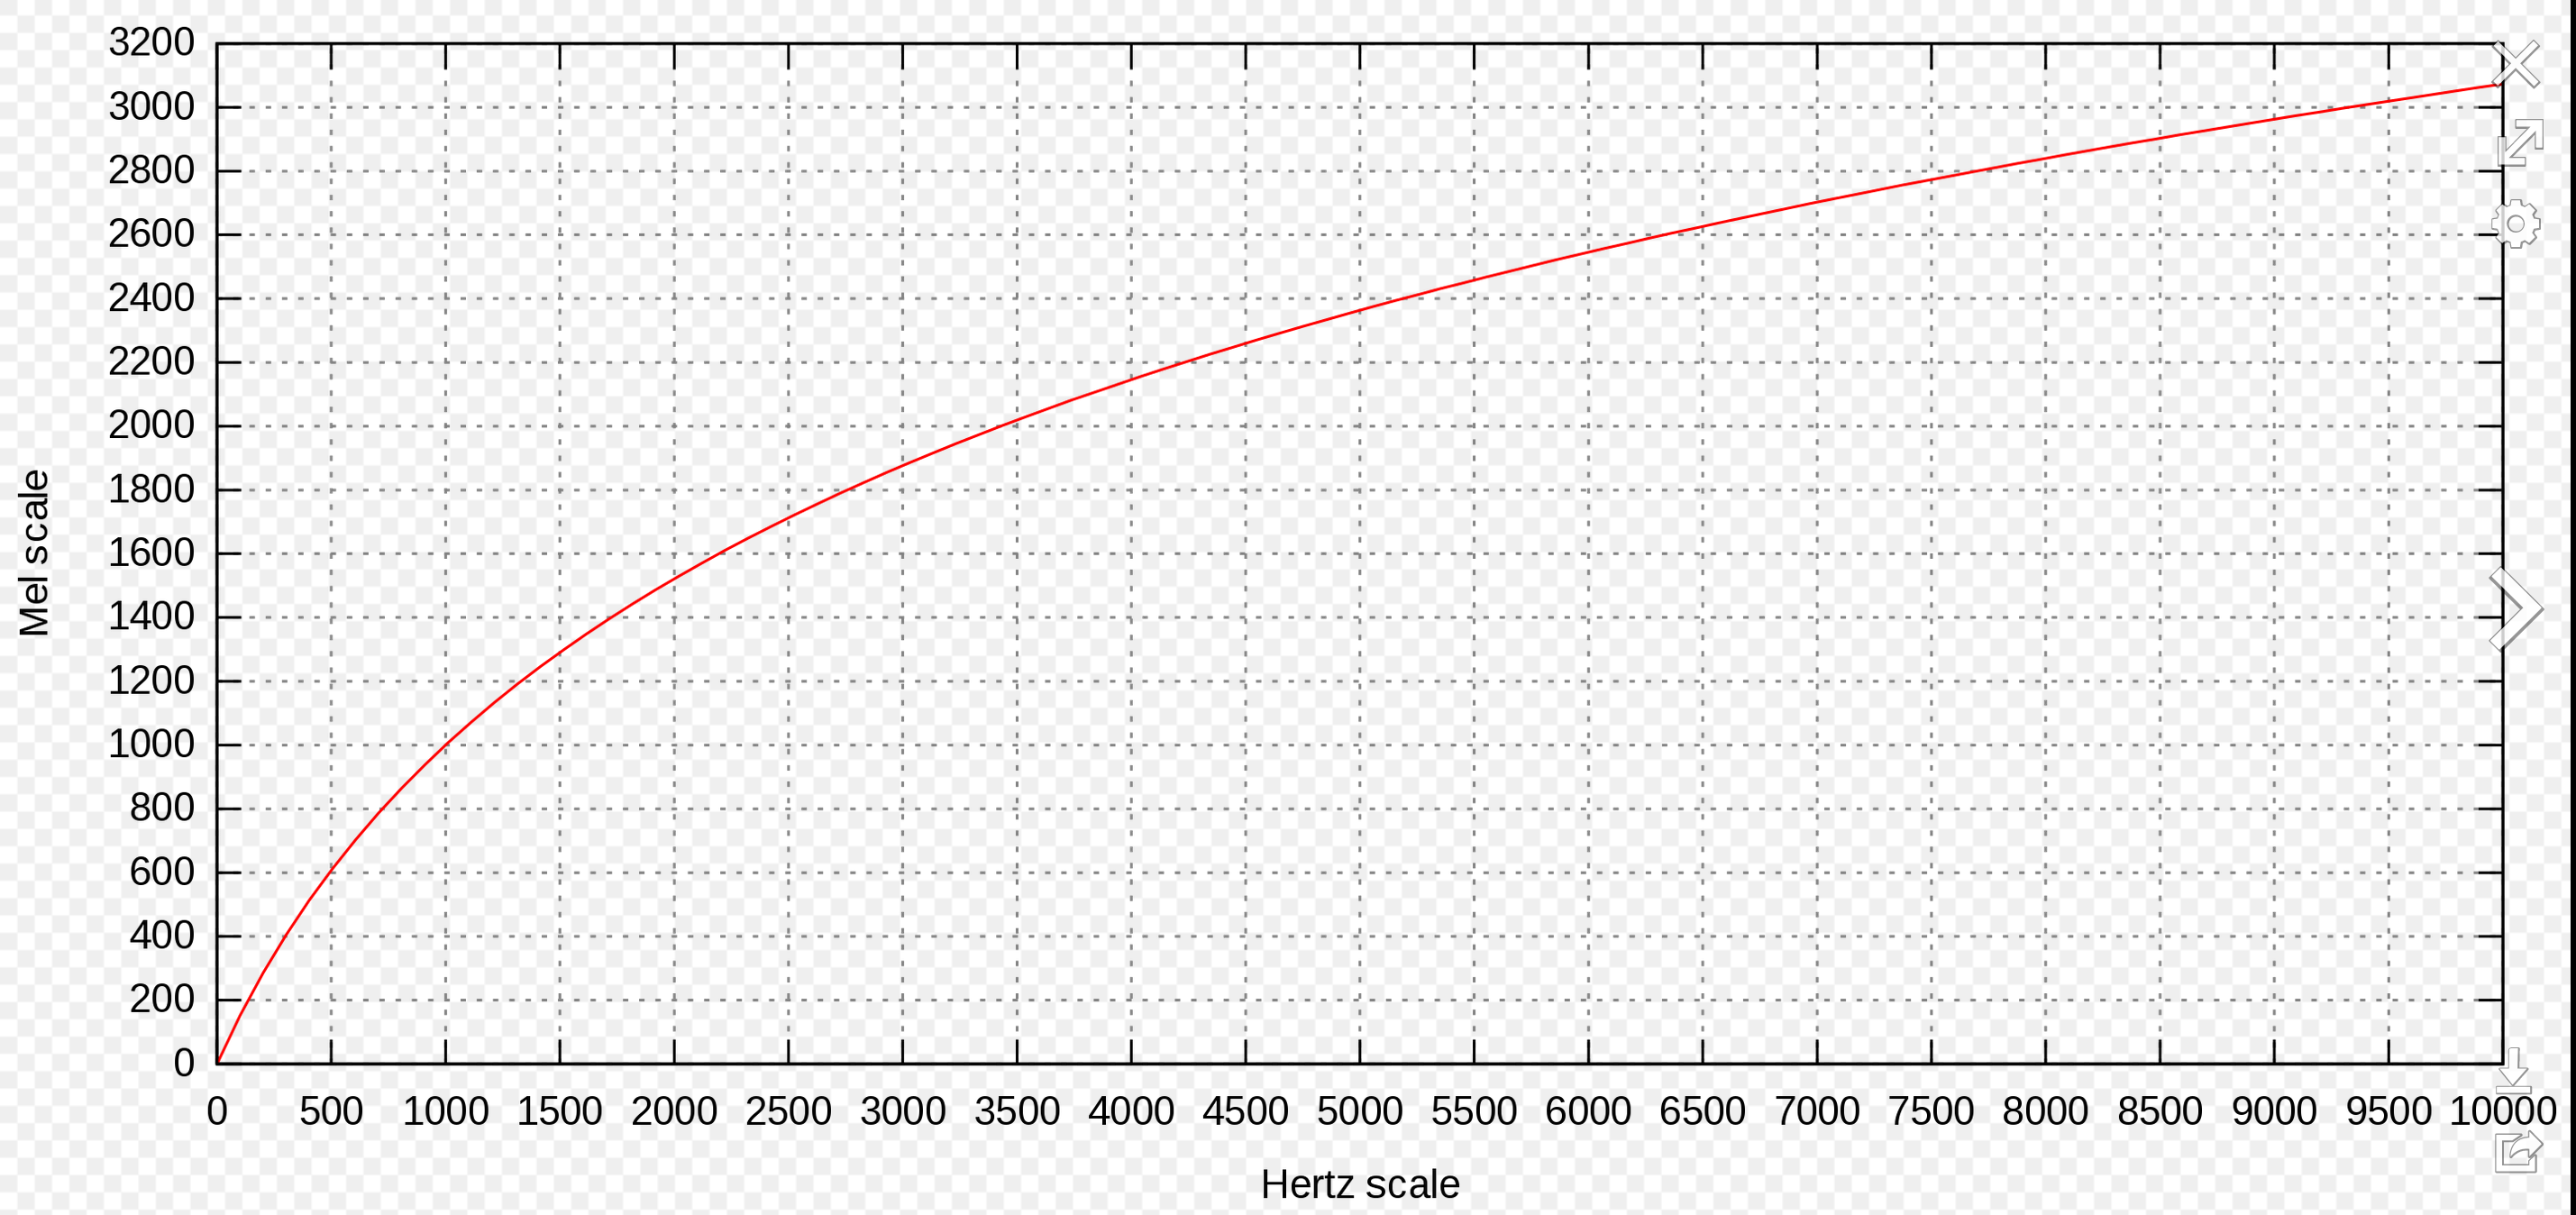

In [8]:
Image('../images/melScale.png') 

### Computing a Cepstrum

$$ C(x(t)) = F^{-1}[log(F[x(t)])]$$

Where $x(t)$ is our time domain signal, $F$ represents a fourier transform, so $F[x(t)]$ is simply our fourier transform to get our spectrum. We then take a log transform of the amplitudes of the spectrum (also called the "log spectrum") which gets us the magnitude spectrum in dB. Then in the final step, we compute a spectrum *of* the spectrum (hence the term 'cepstrum'). Technically we perform an inverse Fourier transform, but on the log spectrum. This moves us from the frequency domain to the **quefrency** domain (are you getting the play on words yet?!)

If we think about what we are doing with the Fourier transform, we are essentially measuring the amount of energy at particular periodicities. When we have the spectral respresentation (so frequency on X axis) we can typically also see (or at least, measure) periodicities in this representation as well due to the harmonic relations present in complex waveforms.

### Computing a Mel-Frequency Cepstrum

Computing a Mel Frequency Cepstrum is the same as described above but with one additional step: we apply a filter operation (or **lift**ering!) to the log spectrum prior to performing the final fourier transform. 

The mel scale gets segmented into $Q$ bands of constant (mel) width, and the mel frequencies within each band are then aggregated. On the linear Hz scale this yeilds $Q$ bands with non-uniform bandwidth which are supposed to relate closely to the critical bands. The bands are formed using half-overlapping triangular weighting functions with the typical number of total bands usually set to 40, where the first ~13 are roughly equally (linearly) spaced (up through 1000Hz) after which the remaining 27 mel bands are arranged logarithmically.

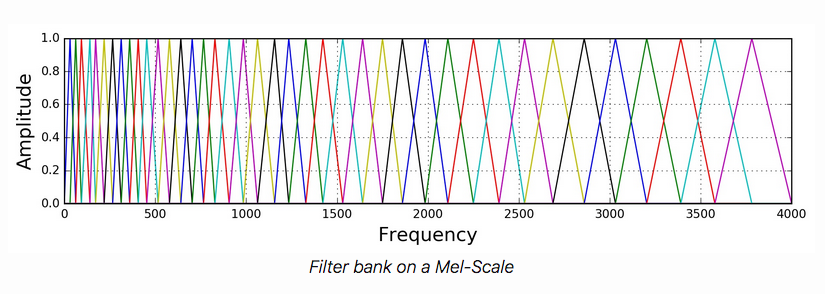

In [9]:
Image('../images/filterbanks.png')

So the process looks like:

Signal -> DFT -> log spectrum -> mel scaling -> iDFT (or DCT)

Thus, MFCCs are a "multidimensional" feature meaning the calculation will return multiple values (i.e., coefficients; one per filterbank) for every analysis (STFT) window. The number of filterbanks can vary (some implementations seem to only use 26 and not 40). In addition, the actual total number of coefficients you retain is variable. For instance, you could choose to use only 20 coefficients instead of 40. 

It is common in speech recognition, for example, to only use the first 13 coefficients and discard the rest. (This reduces the dimensions of the data, while keeping the most valuable information.)

In MIR we often want to keep at least 20 filterbanks since information about faster moving frequencies may also be useful/relevant depending on the task.

**Note that despite their proven usefulness in many tasks such as speech detection, genre detection, etc., it remains difficult to relate particular 'MFCC profiles' (or weightings) to any particular audible feature of an input signal.**

Keep in mind that this feature does not give a single value per frame (unlike other spectral features), but rather a vector of values per frame. To graph the output, then, we have to use a heatmap (similar to graphing the spectrogram output). This is usually referred to as a **Mel spectrogram**

It is important to note, however, that the utility of plotting the output of MFCCs is fairly limited. 

(20, 2277)

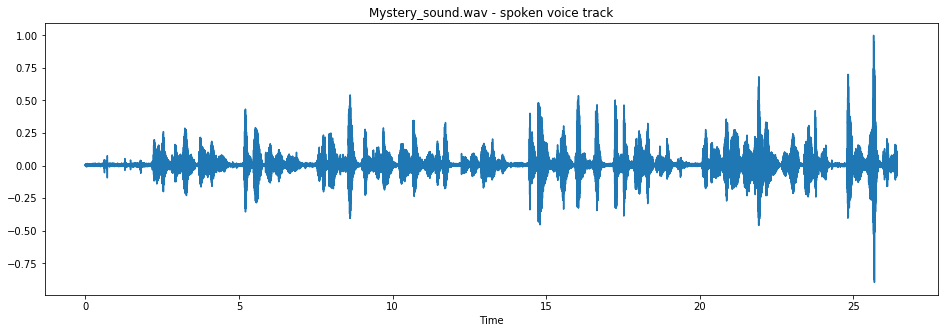

In [10]:
(fs, x) = read('../uploaded_files/mystery_sound.wav')
newx = x/np.abs(x.max()) #normalize from -1 to 1
t = np.linspace(0,len(newx)/fs,len(newx)) #create time axis points

plt.plot(t, newx)
plt.title('Mystery_sound.wav - spoken voice track')
plt.xlabel('Time')

mfcc_data= mfcc(y=newx,sr=fs,n_mfcc=20)
mfcc_data.shape

Here we have 2277 frames with 20 MFCCs in each.  Note that the very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. For this reason it is commonly discarded when performing classification tasks. Here, we will look at the entire output.

Text(0.5, 1.0, 'MFCCs')

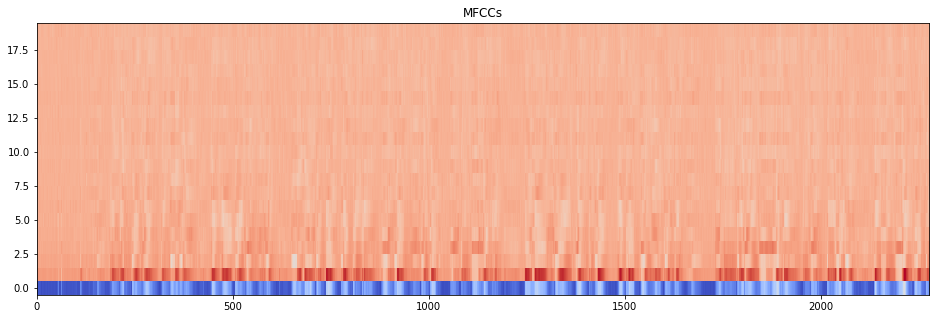

In [12]:

plt.imshow(mfcc_data, aspect='auto', origin='lower', cmap='coolwarm')
plt.title('MFCCs')